In [130]:
#importing important libaries

import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.max_row',None)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import chart_studio.plotly as py
cf.go_offline()

In [131]:
init_notebook_mode(connected=True)

In [6]:
#reading in the dataset into a dataframe and ooking at the head of the data
movies = pd.read_csv('movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#information about our data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
#cleaning the dataset

In [9]:
#checking for missing data
for col in movies.columns:
    pct_missing_values= np.mean(movies[col].isnull())
    print(col,'-',pct_missing_values,'%')

name - 0.0 %
rating - 0.010041731872717789 %
genre - 0.0 %
year - 0.0 %
released - 0.0002608242044861763 %
score - 0.0003912363067292645 %
votes - 0.0003912363067292645 %
director - 0.0 %
writer - 0.0003912363067292645 %
star - 0.00013041210224308815 %
country - 0.0003912363067292645 %
budget - 0.2831246739697444 %
gross - 0.02464788732394366 %
company - 0.002217005738132499 %
runtime - 0.0005216484089723526 %


In [10]:
#dealing with missing values in the numeric columns
#replacing them with the mean of the entire column
movies['budget'].fillna(value=movies['budget'].mean(),inplace=True)
movies['gross'].fillna(value=movies['gross'].mean(),inplace=True)
movies['score'].fillna(value=movies['score'].mean(),inplace=True)
movies['votes'].fillna(value=movies['votes'].mean(),inplace=True)

#changing the data types of some columns
movies['budget']=movies['budget'].astype('int64')
movies['gross']=movies['gross'].astype('int64')

#dropping all empty rows
movies.dropna(inplace=True)

In [11]:
#making the released column a pandas datetime object
movies['released']=movies['released'].apply(lambda x:(x[0:-15]).strip())

In [12]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


# EXPLORATORY AND DESCRIPTIVE ANALYSIS

What is the range of year in this data set?

In [156]:
print('The year ranges from {} to {}, which is a span of {}years'.format(movies['year'].min(),movies['year'].max(),(movies['year'].max()-movies['year'].min())))

The year ranges from 1980 to 2020, which is a span of 40years


The movie with the highest and lowest score

In [164]:
min_score=movies[movies['score']==movies['score'].min()][['name','score']]
max_score=movies[movies['score']==movies['score'].max()][['name','score']]
display('The movie(s) with the lowest score is/are:')
display(min_score)
print('\n')
display('The movie(s) with the highest score is/are:')
display(max_score)

'The movie(s) with the lowest score is/are:'

,name,score
4594,Superbabies: Baby Geniuses 2,1.9
5306,Disaster Movie,1.9
5354,The Hottie & the Nottie,1.9


'The movie(s) with the highest score is/are:'

,name,score
2443,The Shawshank Redemption,9.3


The top five movies which grossed the highest amount of money

In [61]:
movies.sort_values(by=['gross'],ascending=False).head()['name']

5445                                        Avatar
7445                             Avengers: Endgame
3045                                       Titanic
6663    Star Wars: Episode VII - The Force Awakens
7244                        Avengers: Infinity War
Name: name, dtype: object

How many types of genre do we have and the Top five genres

In [68]:
print('We have {} different genres in the movie data set'.format(movies['genre'].nunique()))

print('\nThe top five genres are:')
display(movies['genre'].value_counts().head())

We have 18 different genres in the movie data set

The top five genres are:


Comedy       2230
Action       1695
Drama        1477
Crime         544
Biography     439
Name: genre, dtype: int64

How many countries do we have in the dataset?
Who are the top five countries?

In [79]:
print('We have {} countries'.format(movies['country'].nunique()))

print('\nThe top five countries are:')
movies['country'].value_counts().head()

We have 59 countries

The top five countries are:


United States     5447
United Kingdom     808
France             265
Canada             187
Germany            114
Name: country, dtype: int64

Which movie grossed the highest amount in each country?
Which movie had the biggest budget in each country?

In [177]:
#creating a list of the diffrent countries in our data set
# You can use a forloop like this to get the different countries in the dat set
country_list=[]
for col in movies['country']:
    if col not in country_list:
        country_list.append(col)
print(country_list)

['United Kingdom', 'United States', 'South Africa', 'West Germany', 'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France', 'South Korea', 'Sweden', 'Spain', 'Hong Kong', 'Mexico', 'Switzerland', 'Netherlands', 'New Zealand', 'Philippines', 'Israel', 'Hungary', 'Japan', 'Brazil', 'Yugoslavia', 'Argentina', 'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China', 'Belgium', 'Austria', 'Portugal', 'Vietnam', 'Republic of Macedonia', 'Russia', 'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic', 'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia', 'Romania', 'United Arab Emirates', 'Indonesia', 'Turkey', 'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile', 'Panama', 'Malta', 'Lebanon']


In [182]:
# or use the unique() function tha gives an array of the unique elements in a series or dataframe column
for country in movies['country'].unique():
    uk_df = movies[movies['country']==country]
    max_gross= uk_df[uk_df['gross']==uk_df['gross'].max()]
    display(max_gross[['name','country','gross','year']])

,name,country,gross,year
5845,Harry Potter and the Deathly Hallows: Part 2,United Kingdom,1342321665,2011


,name,country,gross,year
5445,Avatar,United States,2847246203,2009


,name,country,gross,year
5459,District 9,South Africa,210888950,2009


,name,country,gross,year
487,The NeverEnding Story,West Germany,20251411,1984


,name,country,gross,year
7245,Deadpool 2,Canada,786470484,2018


,name,country,gross,year
6643,Mad Max: Fury Road,Australia,375658750,2015


,name,country,gross,year
49,Lion of the Desert,Libya,78500541,1980


,name,country,gross,year
3055,Life Is Beautiful,Italy,230098753,1997


,name,country,gross,year
66,Moscow Does Not Believe in Tears,Soviet Union,78500541,1980
573,Repentance,Soviet Union,78500541,1984


,name,country,gross,year
7410,The Grinch,France,512492755,2018


,name,country,gross,year
7452,Parasite,South Korea,258908054,2019


,name,country,gross,year
5499,The Girl with the Dragon Tattoo,Sweden,104414200,2009


,name,country,gross,year
3873,The Others,Spain,209947037,2001


,name,country,gross,year
3904,Rush Hour 2,Hong Kong,347325802,2001


,name,country,gross,year
491,Romancing the Stone,Mexico,86572238,1984


,name,country,gross,year
5795,Conviction,Switzerland,11104555,2010


,name,country,gross,year
671,Flesh+Blood,Netherlands,78500541,1985
2185,For a Lost Soldier,Netherlands,78500541,1992


,name,country,gross,year
4245,The Lord of the Rings: The Return of the King,New Zealand,1146030912,2003


,name,country,gross,year
456,Stryker,Philippines,1723487,1983


,name,country,gross,year
462,Hanna K.,Israel,78500541,1983


,name,country,gross,year
637,Lily in Love,Hungary,78500541,1984


,name,country,gross,year
3273,Godzilla,Japan,379014294,1998


,name,country,gross,year
4053,City of God,Brazil,30680793,2002


,name,country,gross,year
816,Bal na vodi,Yugoslavia,78500541,1985
1338,Time of the Gypsies,Yugoslavia,78500541,1988


,name,country,gross,year
1028,Man Facing Southeast,Argentina,78500541,1986


,name,country,gross,year
3675,"Crouching Tiger, Hidden Dragon",Taiwan,213525736,2000


,name,country,gross,year
3882,Enemy at the Gates,Ireland,96976270,2001


,name,country,gross,year
7528,The Lego Movie 2: The Second Part,Denmark,192306508,2019


,name,country,gross,year
5713,Resident Evil: Afterlife,Germany,300228084,2010


,name,country,gross,year
1724,Close-Up,Iran,78500541,1990
2580,Through the Olive Trees,Iran,78500541,1994


,name,country,gross,year
7055,The Fate of the Furious,China,1236005118,2017


,name,country,gross,year
6560,The Loft,Belgium,11020402,2014


,name,country,gross,year
2281,The Three Musketeers,Austria,53898845,1993


,name,country,gross,year
2333,The House of the Spirits,Portugal,6265311,1993


,name,country,gross,year
7607,Furie,Vietnam,5756185,2019


,name,country,gross,year
2625,Pred dozhdot,Republic of Macedonia,763847,1994


,name,country,gross,year
4605,Night Watch,Russia,50336279,2004


,name,country,gross,year
3370,"Crna macka, beli macor",Federal Republic of Yugoslavia,351447,1998


,name,country,gross,year
2826,To vlemma tou Odyssea,Greece,78500541,1995


,name,country,gross,year
5125,Hannibal Rising,Czech Republic,82169884,2007


,name,country,gross,year
6008,Jo Nesbø's Headhunters,Norway,18962444,2011


,name,country,gross,year
6917,Dangal,India,303723636,2016


,name,country,gross,year
3354,Belly,Jamaica,9639390,1998


,name,country,gross,year
3419,Knock Off,Aruba,10319915,1998


,name,country,gross,year
4808,The Protector,Thailand,27165581,2005


,name,country,gross,year
4623,Maria Full of Grace,Colombia,12594630,2004


,name,country,gross,year
5204,"4 Months, 3 Weeks and 2 Days",Romania,10174839,2007


,name,country,gross,year
5867,Contagion,United Arab Emirates,136515867,2011


,name,country,gross,year
5914,The Raid: Redemption,Indonesia,9148519,2011


,name,country,gross,year
6760,Mustang,Turkey,5274664,2015


,name,country,gross,year
6423,In Secret,Serbia,652228,2013


,name,country,gross,year
7150,Loving Vincent,Poland,42187665,2017


,name,country,gross,year
6545,The Good Lie,Kenya,3396345,2014


,name,country,gross,year
6964,The Angry Birds Movie,Finland,352333929,2016


,name,country,gross,year
7360,Arctic,Iceland,4165776,2018


,name,country,gross,year
6812,The 33,Chile,27972023,2015


,name,country,gross,year
7026,Hands of Stone,Panama,4978353,2016


,name,country,gross,year
7080,Murder on the Orient Express,Malta,352794081,2017


,name,country,gross,year
7302,Capharnaüm,Lebanon,64417003,2018


In [181]:
#movie with the highest budget amount in each country and their amount
for country in movies['country'].unique():
    uk_df = movies[movies['country']==country]
    max_gross= uk_df[uk_df['budget']==uk_df['budget'].max()]
    display(max_gross[['name','country','budget','year']])
    
#unlike the gross amounts, we have more than two movies who share hte maximum amount for budget in each country

,name,country,budget,year
5451,Harry Potter and the Half-Blood Prince,United Kingdom,250000000,2009
6047,The Dark Knight Rises,United Kingdom,250000000,2012


,name,country,budget,year
7445,Avengers: Endgame,United States,356000000,2019


,name,country,budget,year
6087,Safe House,South Africa,85000000,2012


,name,country,budget,year
323,Kamikaze 89,West Germany,35589876,1982
494,"Paris, Texas",West Germany,35589876,1984
866,The Name of the Rose,West Germany,35589876,1986
1090,Wings of Desire,West Germany,35589876,1987
1127,Bagdad Cafe,West Germany,35589876,1987
1841,The Nasty Girl,West Germany,35589876,1990


,name,country,budget,year
7651,The Call of the Wild,Canada,135000000,2020


,name,country,budget,year
6643,Mad Max: Fury Road,Australia,150000000,2015


,name,country,budget,year
49,Lion of the Desert,Libya,35000000,1980


,name,country,budget,year
54,City of Women,Italy,35589876,1980
202,Comin' at Ya!,Italy,35589876,1981
376,Nostalghia,Italy,35589876,1983
416,Escape from the Bronx,Italy,35589876,1983
421,"Yor, the Hunter from the Future",Italy,35589876,1983
571,Cut and Run,Italy,35589876,1984
618,Kaos,Italy,35589876,1984
619,Misunderstood,Italy,35589876,1984
827,Maccheroni,Italy,35589876,1985
982,Devil in the Flesh,Italy,35589876,1986


,name,country,budget,year
573,Repentance,Soviet Union,35589876,1984


,name,country,budget,year
7093,Valerian and the City of a Thousand Planets,France,177200000,2017


,name,country,budget,year
190,Inchon,South Korea,46000000,1981


,name,country,budget,year
745,My Life as a Dog,Sweden,35589876,1985
895,The Sacrifice,Sweden,35589876,1986
2198,The Best Intentions,Sweden,35589876,1992
2238,House of Angels,Sweden,35589876,1992
3361,Show Me Love,Sweden,35589876,1998
3814,Songs from the Second Floor,Sweden,35589876,2000
3828,Tillsammans,Sweden,35589876,2000
4160,Lilya 4-Ever,Sweden,35589876,2002
4373,Evil,Sweden,35589876,2003
4635,As It Is in Heaven,Sweden,35589876,2004


,name,country,budget,year
7560,Wonder Park,Spain,90000000,2019


,name,country,budget,year
3904,Rush Hour 2,Hong Kong,90000000,2001


,name,country,budget,year
582,Under the Volcano,Mexico,35589876,1984
794,Radioactive Dreams,Mexico,35589876,1985
2019,Sólo con tu pareja,Mexico,35589876,1991
4832,Battle in Heaven,Mexico,35589876,2005
5615,Sin Nombre,Mexico,35589876,2009
5634,Daniel and Ana,Mexico,35589876,2009
5768,Biutiful,Mexico,35589876,2010
7002,The Untamed,Mexico,35589876,2016
7626,No Manches Frida 2,Mexico,35589876,2019
7633,Tod@s Caen,Mexico,35589876,2019


,name,country,budget,year
919,Bad Blood,Switzerland,35589876,1986
934,Manon of the Spring,Switzerland,35589876,1986
952,Jean de Florette,Switzerland,35589876,1986
2219,Hyenas,Switzerland,35589876,1992
2484,Three Colors: Red,Switzerland,35589876,1994
2520,Three Colors: White,Switzerland,35589876,1994


,name,country,budget,year
321,La traviata,Netherlands,35589876,1982
1038,The Assault,Netherlands,35589876,1986
1476,"The Cook, the Thief, His Wife & Her Lover",Netherlands,35589876,1989
2185,For a Lost Soldier,Netherlands,35589876,1992
2836,Antonia's Line,Netherlands,35589876,1995
3001,The Pillow Book,Netherlands,35589876,1996
5479,The Human Centipede (First Sequence),Netherlands,35589876,2009
5958,The Human Centipede II (Full Sequence),Netherlands,35589876,2011


,name,country,budget,year
6455,The Hobbit: The Battle of the Five Armies,New Zealand,250000000,2014


,name,country,budget,year
456,Stryker,Philippines,35589876,1983


,name,country,budget,year
462,Hanna K.,Israel,35589876,1983
998,Every Time We Say Goodbye,Israel,35589876,1986
6327,Big Bad Wolves,Israel,35589876,2013
6429,The Congress,Israel,35589876,2013


,name,country,budget,year
637,Lily in Love,Hungary,35589876,1984
4442,Control,Hungary,35589876,2003
6835,Son of Saul,Hungary,35589876,2015


,name,country,budget,year
3273,Godzilla,Japan,130000000,1998


,name,country,budget,year
711,Kiss of the Spider Woman,Brazil,35589876,1985
4053,City of God,Brazil,35589876,2002
4432,Carandiru,Brazil,35589876,2003


,name,country,budget,year
787,Otac na sluzbenom putu,Yugoslavia,35589876,1985
816,Bal na vodi,Yugoslavia,35589876,1985
820,Colonel Redl,Yugoslavia,35589876,1985
1338,Time of the Gypsies,Yugoslavia,35589876,1988


,name,country,budget,year
781,The Official Story,Argentina,35589876,1985
4034,La Ciénaga,Argentina,35589876,2001
4575,The Motorcycle Diaries,Argentina,35589876,2004


,name,country,budget,year
786,Taipei Story,Taiwan,35589876,1985
2206,Qing shao nian nuo zha,Taiwan,35589876,1992
2564,Eat Drink Man Woman,Taiwan,35589876,1994
3748,Yi Yi,Taiwan,35589876,2000


,name,country,budget,year
3882,Enemy at the Gates,Ireland,68000000,2001


,name,country,budget,year
7528,The Lego Movie 2: The Second Part,Denmark,99000000,2019


,name,country,budget,year
4486,A Series of Unfortunate Events,Germany,140000000,2004


,name,country,budget,year
1724,Close-Up,Iran,35589876,1990
2580,Through the Olive Trees,Iran,35589876,1994
3135,Taste of Cherry,Iran,35589876,1997
3574,The Wind Will Carry Us,Iran,35589876,1999
3626,The Color of Paradise,Iran,35589876,1999
5587,Darbareye Elly,Iran,35589876,2009
6992,The Salesman,Iran,35589876,2016


,name,country,budget,year
7055,The Fate of the Furious,China,250000000,2017


,name,country,budget,year
5482,Mr. Nobody,Belgium,47000000,2009


,name,country,budget,year
5219,The Counterfeiters,Austria,35589876,2007
6536,Goodnight Mommy,Austria,35589876,2014
7629,The Ground Beneath My Feet,Austria,35589876,2019


,name,country,budget,year
2333,The House of the Spirits,Portugal,40000000,1993


,name,country,budget,year
2391,The Scent of Green Papaya,Vietnam,35589876,1993
7607,Furie,Vietnam,35589876,2019


,name,country,budget,year
2625,Pred dozhdot,Republic of Macedonia,1900000,1994


,name,country,budget,year
4208,Russian Ark,Russia,35589876,2002
4367,The Return,Russia,35589876,2003
6618,Leviathan,Russia,35589876,2014
7221,Loveless,Russia,35589876,2017


,name,country,budget,year
3370,"Crna macka, beli macor",Federal Republic of Yugoslavia,35589876,1998


,name,country,budget,year
2826,To vlemma tou Odyssea,Greece,35589876,1995
5487,Dogtooth,Greece,35589876,2009


,name,country,budget,year
4812,A Sound of Thunder,Czech Republic,80000000,2005


,name,country,budget,year
3181,Insomnia,Norway,35589876,1997
4987,Reprise,Norway,35589876,2006
5747,Trollhunter,Norway,35589876,2010
5955,"Oslo, August 31st",Norway,35589876,2011
6008,Jo Nesbø's Headhunters,Norway,35589876,2011
6222,Into the White,Norway,35589876,2012
6753,The Wave,Norway,35589876,2015
7167,Thelma,Norway,35589876,2017
7438,The Quake,Norway,35589876,2018


,name,country,budget,year
3325,Kuch Kuch Hota Hai,India,35589876,1998
3800,Hey Ram,India,35589876,2000
3835,Kaho Naa... Pyaar Hai,India,35589876,2000
3962,Lagaan: Once Upon a Time in India,India,35589876,2001
3975,Dil Chahta Hai,India,35589876,2001
4013,Monsoon Wedding,India,35589876,2001
4115,Devdas,India,35589876,2002
4363,Kal Ho Naa Ho,India,35589876,2003
4587,Swades,India,35589876,2004
4596,Black Friday,India,35589876,2004


,name,country,budget,year
3354,Belly,Jamaica,3000000,1998


,name,country,budget,year
3419,Knock Off,Aruba,30000000,1998


,name,country,budget,year
4353,Ong-Bak: The Thai Warrior,Thailand,35589876,2003
4808,The Protector,Thailand,35589876,2005
5388,Chocolate,Thailand,35589876,2008
5743,Uncle Boonmee Who Can Recall His Past Lives,Thailand,35589876,2010
6825,Cemetery of Splendor,Thailand,35589876,2015


,name,country,budget,year
4623,Maria Full of Grace,Colombia,3000000,2004


,name,country,budget,year
5204,"4 Months, 3 Weeks and 2 Days",Romania,35589876,2007


,name,country,budget,year
5867,Contagion,United Arab Emirates,60000000,2011


,name,country,budget,year
6547,The Raid 2,Indonesia,4500000,2014


,name,country,budget,year
6040,Once Upon a Time in Anatolia,Turkey,35589876,2011
6629,Winter Sleep,Turkey,35589876,2014
6760,Mustang,Turkey,35589876,2015


,name,country,budget,year
6423,In Secret,Serbia,35589876,2013


,name,country,budget,year
6431,Ida,Poland,35589876,2013
6798,The Lure,Poland,35589876,2015
7150,Loving Vincent,Poland,35589876,2017
7354,Cold War,Poland,35589876,2018


,name,country,budget,year
6545,The Good Lie,Kenya,20000000,2014


,name,country,budget,year
6964,The Angry Birds Movie,Finland,73000000,2016


,name,country,budget,year
6791,Z for Zachariah,Iceland,7500000,2015


,name,country,budget,year
7433,Gloria Bell,Chile,35589876,2018


,name,country,budget,year
7026,Hands of Stone,Panama,20000000,2016


,name,country,budget,year
7080,Murder on the Orient Express,Malta,55000000,2017


,name,country,budget,year
7302,Capharnaüm,Lebanon,4000000,2018


How does the score column look like?

<Figure size 864x432 with 0 Axes>

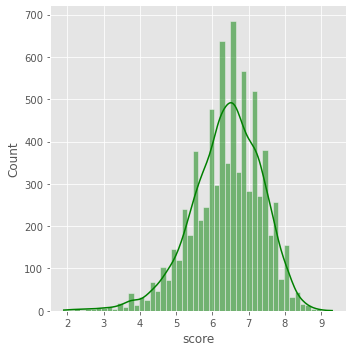

In [128]:
plt.figure(figsize=(12,6))
sns.displot(x=movies['score'],kde=True,bins=50,color='green')

#We can say the score is normally distributed
# but it its looking like its skewing to the right just a little

What does the relationship between the budget and gross amount look like?

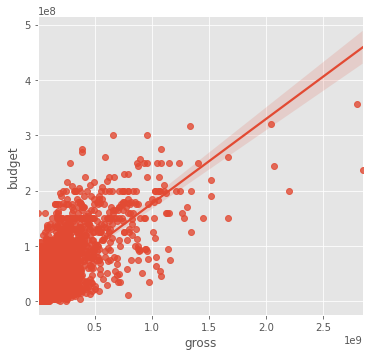

In [151]:
sns.lmplot(x='gross',y='budget',data=movies,palette='seismic')
# It looks like there is a linear relationship between the two variables

In [152]:
movies[['budget','gross']].corr()
#just like the plot above shows, there is a strong correlation between the budget and gross

,budget,gross
budget,1.000000,0.712569
gross,0.712569,1.000000


Trying to normalize the budget and gross column, to see if the plots will look different

In [148]:
movies_normalize = movies.copy()
  
#normalize the gross column
movies_normalize['gross'] = movies_normalize['gross'] /movies_normalize['gross'] .abs().max()
movies_normalize['budget'] = movies_normalize['budget'] /movies_normalize['budget'] .abs().max()
# view normalized data
movies_normalize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,0.053371,0.016507,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,0.012640,0.020670,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,0.050562,0.189086,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,0.009831,0.029310,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,0.016854,0.013995,Orion Pictures,98.0


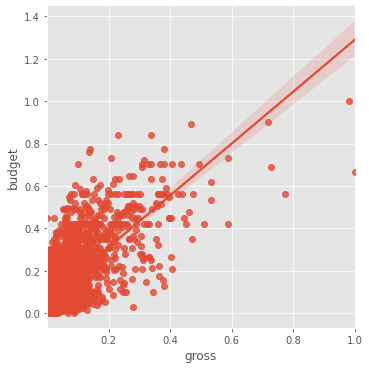

In [150]:
sns.lmplot(x='gross',y='budget',data=movies_normalize,palette='seismic')

#It looks exactly the same

<AxesSubplot:>

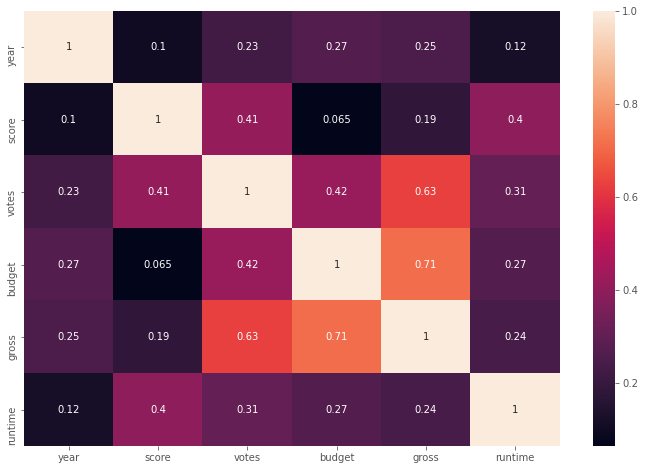

In [155]:
#A heat map of the correlation between the numerical variables
movies_corr= movies.corr()
sns.heatmap(movies_corr,annot=True)

In [45]:
# sns.pairplot(movies,palette='coolwarm')

GROUPING BY RATING

In [52]:
by_rating_count = movies.groupby('rating').count()
by_rating_mean = movies.groupby('rating').mean()
by_rating_count

,name,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,,,,,,,,,,,,,,
Approved,1,1,1,1,1,1,1,1,1,1,1,1,1,1
G,153,153,153,153,153,153,153,153,153,153,153,153,153,153
NC-17,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Not Rated,282,282,282,282,282,282,282,282,282,282,282,282,282,282
PG,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249
PG-13,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110
R,3690,3690,3690,3690,3690,3690,3690,3690,3690,3690,3690,3690,3690,3690
TV-14,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TV-MA,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [53]:
#barchart of what the ratings look like
by_rating_count['name'].iplot(kind='bar',color='green')

#movies rated R are more

In [54]:
by_rating_mean['gross'].iplot(kind='bar',color='green')
# we see here that movies rated G gross more money than any other movie rating
#although movies rated R are released more but they dont bring in the highest gross

In [15]:
#group by year and aggregate by count
by_year_count= movies.groupby('year').count()
by_year_count.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
year,,,,,,,,,,,,,,
1980,90,90,90,90,90,90,90,90,90,90,90,90,90,90
1981,112,112,112,112,112,112,112,112,112,112,112,112,112,112
1982,125,125,125,125,125,125,125,125,125,125,125,125,125,125
1983,140,140,140,140,140,140,140,140,140,140,140,140,140,140
1984,165,165,165,165,165,165,165,165,165,165,165,165,165,165


In [51]:
by_year_count['name'].iplot(kind='bar',color='cyan')

# we can see that the number of movies released between 1980 and 1985 kept increasing
# it then became stable from 1985 to 2018
# it decreased again in 2019
# in 2020, it was really small, maybe because the data was last updated in 2020

In [17]:
#group by year and aggregate by mean
by_year_mean= movies.groupby('year').mean()
by_year_mean.head()

#from the table below

,score,votes,budget,gross,runtime
year,,,,,
1980,6.287778,45555.677778,2.332461e+07,3.631736e+07,107.744444
1981,6.284821,27871.035714,2.031611e+07,2.870609e+07,105.571429
1982,6.286400,33427.768000,2.121403e+07,2.989664e+07,105.808000
1983,6.030000,29069.500000,1.985582e+07,2.689249e+07,102.892857
1984,6.169091,35205.151515,2.315112e+07,2.610104e+07,104.430303


In [18]:
display('the year with the highest gorss average',by_year_mean[by_year_mean['gross']== by_year_mean['gross'].max()])
print('\n')
display('the year with the lowest gorss average',by_year_mean[by_year_mean['gross']== by_year_mean['gross'].min()])
#the year 2020 grossed the highest average amount even tho its the year with the least amount of release

'the year with the highest gorss average'

,score,votes,budget,gross,runtime
year,,,,,
2020,6.166027,102132.300317,6.936363e+07,182587856.2,114.2


'the year with the lowest gorss average'

,score,votes,budget,gross,runtime
year,,,,,
1986,6.153571,28922.132653,2.370319e+07,2.419636e+07,102.091837


In [35]:
by_year_mean[['gross','budget']].iplot()

# We can now see the full representation of the average gross per year
# even tho it is not consistently increasing between years closer to each other
# it obvious the average gross increases as we go from 1980 to 2020

#the budget on the other hand doesnt increase as fast as the gross but it also increases
# from year 1993 the difference between the budget and gross started getting wider

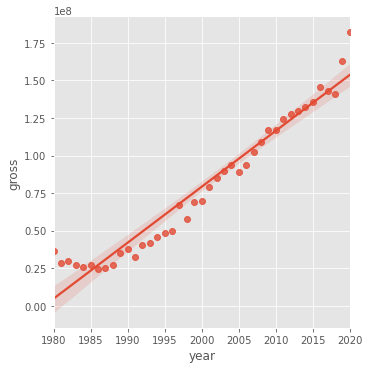

In [166]:
#there seem to be a linear relationship between year and gross. 
sns.lmplot(x='year',y='gross',data=by_year_mean.reset_index())

GROUPING BY YEAR AND THEN RATING

In [184]:
By_YearRating = movies.groupby(by=['year','rating']).count()['gross'].unstack()
By_YearRating.head()
# By_YearRating.dropna(axis=1)

rating,Approved,G,NC-17,Not Rated,PG,PG-13,R,TV-14,TV-MA,TV-PG,Unrated,X
year,,,,,,,,,,,,
1980,NaN,3.0,NaN,1.0,44.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN
1981,1.0,2.0,1.0,1.0,37.0,NaN,69.0,NaN,NaN,1.0,NaN,NaN
1982,NaN,5.0,NaN,4.0,50.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN
1983,NaN,1.0,NaN,4.0,59.0,NaN,76.0,NaN,NaN,NaN,NaN,NaN
1984,NaN,2.0,NaN,4.0,61.0,18.0,80.0,NaN,NaN,NaN,NaN,NaN


Number of companies

In [186]:
print('We have',movies['company'].nunique(),'unique companies in the data set.')

We have 2340 unique companies in the data set.


In [190]:
print('The top 10 companies with the highest number of released movies are:\n',movies['company'].value_counts().head(10))

The top 10 companies with the highest number of released movies are:
 Universal Pictures           377
Warner Bros.                 333
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              173
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64
